In [44]:
import os

import math
import tensorflow as tf
import tensorflow.keras
from rich.progress import track
import tensorflow_datasets as tfds
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt 

In [45]:
(ds_test, ds_train), ds_info = tfds.load(
    "emnist",
    split=["test", "train"],
    with_info=True,
    shuffle_files=True,
    as_supervised=True,
)

In [46]:
print(ds_info)

tfds.core.DatasetInfo(
    name='emnist',
    full_name='emnist/byclass/3.1.0',
    description="""
    The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset.
    
    Note: Like the original EMNIST data, images provided here are inverted horizontally and rotated 90 anti-clockwise. You can use `tf.transpose` within `ds.map` to convert the images to a human-friendlier format.
    """,
    config_description="""
    EMNIST ByClass
    """,
    homepage='https://www.nist.gov/itl/products-and-services/emnist-dataset',
    data_dir='/home/mpc/tensorflow_datasets/emnist/byclass/3.1.0',
    file_format=tfrecord,
    download_size=535.73 MiB,
    dataset_size=349.16 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=62),
    }),
    supervised

In [47]:
def normalize_image(image, label):
    image = tf.image.rot90(image, k = 3)
    image = tf.image.flip_left_right(image)
    return tf.cast(image, tf.float32) / 255.0, label


def improve_ds(ds, is_train=False):
    ds = ds.map(normalize_image, num_parallel_calls=tf.data.AUTOTUNE)
    if is_train:
        ds = ds.cache().shuffle(1000)

    return ds


ds_train = improve_ds(ds_train, is_train=True)
ds_test = improve_ds(ds_test)


2024-09-21 12:39:20.716586: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


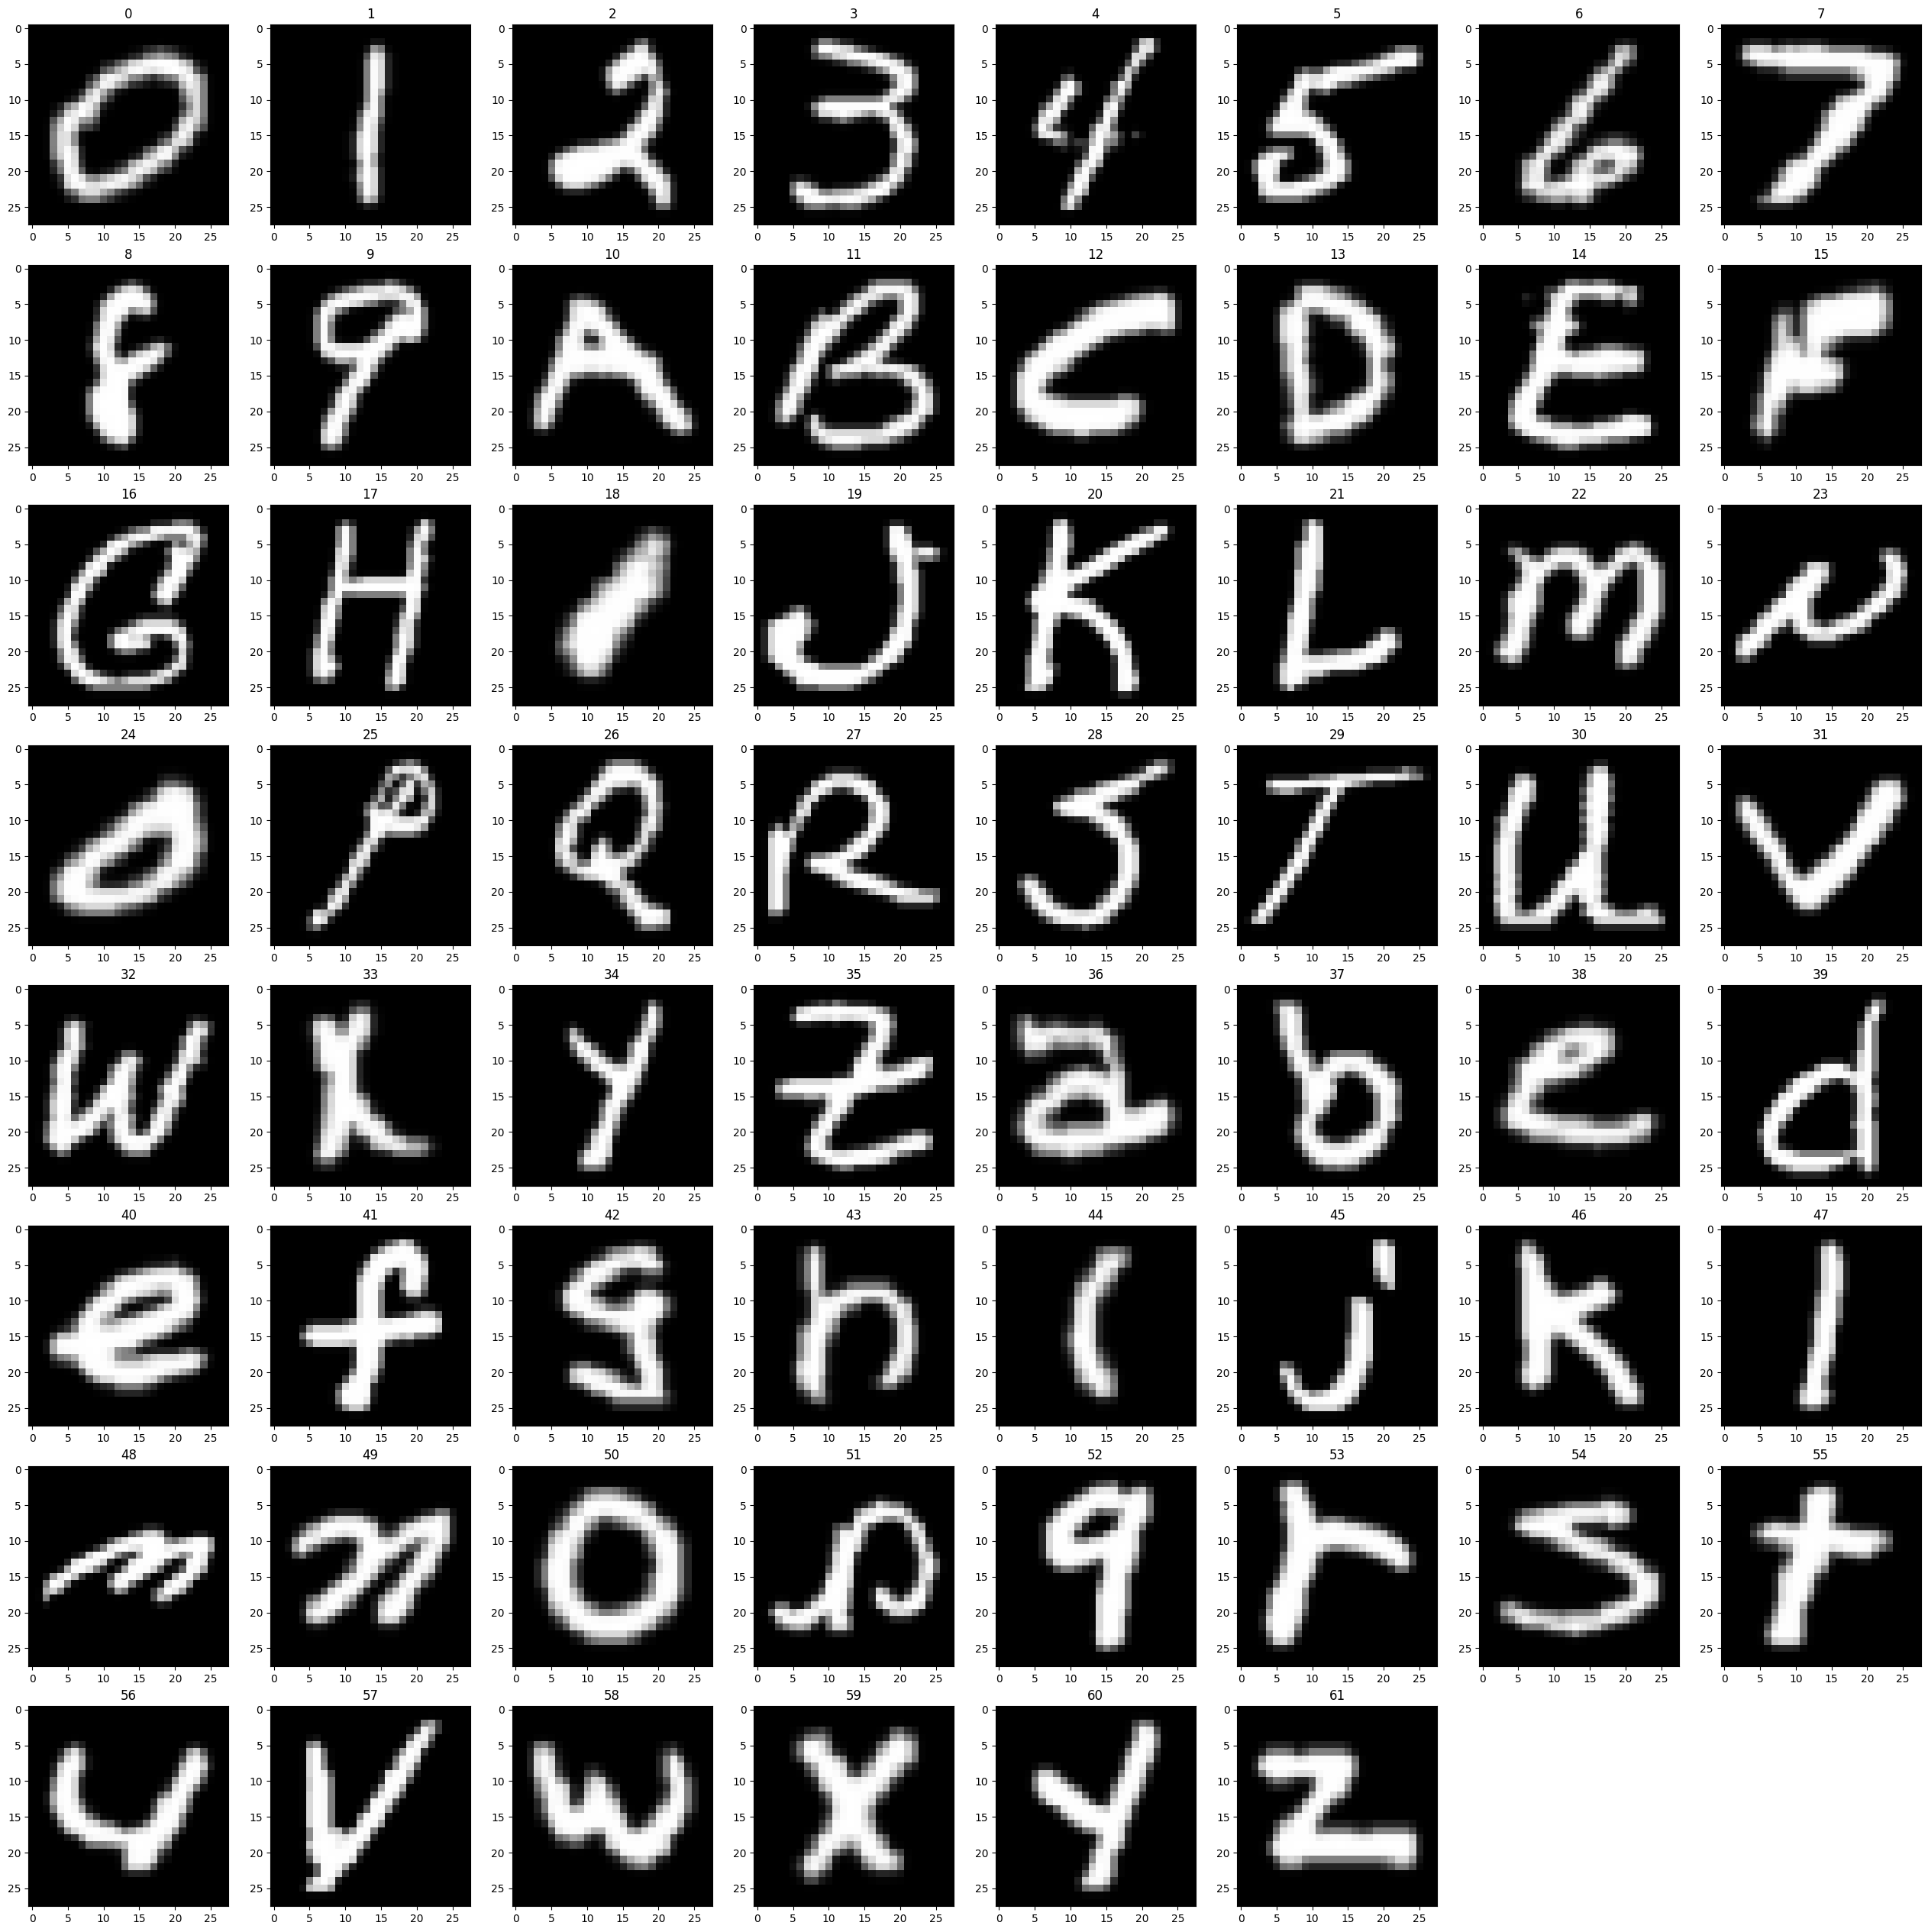

In [48]:
sample_data = {}
for features, label in ds_train:
    if len(sample_data) == 62:
        break 
    sample_data[int(label)] = features

plt.figure(figsize=(32, 32))
for i in range(len(sample_data)):
    plt.subplot(8, 8, i + 1)
    img = np.array(sample_data[i]) 
    plt.imshow(img, cmap="gray")
    plt.title(i)
